In [1]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
from scipy.stats import *
from sklearn.datasets import *
from math import log2

In [2]:
df_true = pd.read_csv('datasets/aniso_1000_20.00_25.00_2.00.csv')
df_true = df_true[df_true.layer==0]
df_true

,index,x,y,layer,weight,rho,delta,nh,isSeed,clusterId
0,0,-51.86,-64.09,0,1,16.0,1.12272,297,0,5
1,1,171.87,-154.07,0,1,23.5,2.59943,495,0,1
2,2,-108.29,15.32,0,1,25.0,4.69145,10,0,0
3,3,175.75,-161.11,0,1,21.5,1.18228,251,0,1
4,4,-111.26,129.91,0,1,14.5,4.88806,144,0,4
...,...,...,...,...,...,...,...,...,...,...
995,995,84.03,-154.88,0,1,1.0,999.00000,-1,0,-1
996,996,203.62,87.55,0,1,1.5,999.00000,-1,0,-1
997,997,108.69,-23.25,0,1,5.0,3.33714,127,0,3
998,998,185.02,141.46,0,1,2.0,999.00000,-1,0,-1


In [3]:
df_true.columns

Index(['index', 'x', 'y', 'layer', 'weight', 'rho', 'delta', 'nh', 'isSeed',
       'clusterId'],
      dtype='object')

In [4]:
isSeed = df_true.apply(lambda x: x['isSeed']>0 and x['nh']>=0, axis=1) 

# sn.scatterplot(df_true.x, df_true.y, isSeed)

/home/dhruv/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

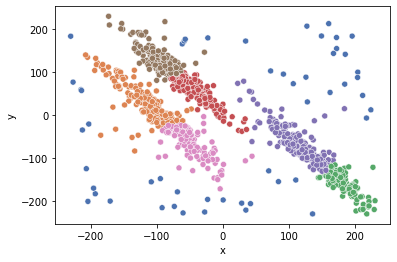

In [5]:
sn.scatterplot(df_true.x, df_true.y, df_true.clusterId, palette='deep', legend=False)

/home/dhruv/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

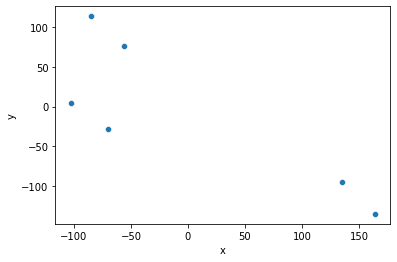

In [6]:
df_seed = df_true[df_true.isSeed>0]
sn.scatterplot(df_seed.x, df_seed.y)

6 seeds, cluster looks accurate


In [7]:
df_fast = pd.read_csv('D1_correct_generated_c_1.csv')
df_fast.head()

,Unnamed: 0,x,y,layer,weight,clusterId,rho,NH,ClusterNumbers,isOutlier,isSeed,delta
0,0,149.840428,-99.655668,0.0,31.829895,3.0,962.058369,6.0,3.0,0.0,0.0,4.100092
1,1,149.708188,-98.566709,0.0,31.784517,3.0,958.653756,0.0,3.0,0.0,0.0,1.096959
2,2,-100.106417,1.329776,0.0,31.769601,1.0,1183.184137,inf,1.0,0.0,1.0,999.000000
3,3,-99.936434,-1.441901,0.0,31.750080,1.0,1163.183600,12.0,1.0,0.0,0.0,2.207122
4,4,148.208547,-96.539511,0.0,31.729600,3.0,949.407335,6.0,3.0,0.0,0.0,0.653073


/home/dhruv/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


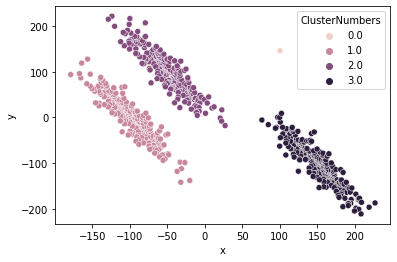

In [8]:
ax = sn.scatterplot(df_fast.x, df_fast.y, df_fast.ClusterNumbers)
plt.savefig('here.jpg')

In [9]:
df = pd.read_csv('datasets/gen_data_2.csv')
df.head()

,Unnamed: 0,x,y,clusterId,weight,layer
0,0,-48.680301,-79.588956,1.0,4.773328,0.0
1,1,-57.669973,-20.752990,1.0,0.741019,0.0
2,2,-97.288593,20.932810,1.0,13.238274,0.0
3,3,-71.346889,-68.241059,1.0,7.022824,0.0
4,4,-91.504244,-23.241372,1.0,25.809310,0.0


/home/dhruv/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

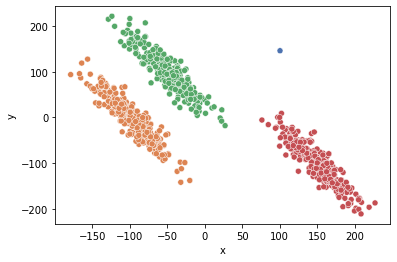

In [10]:
sn.scatterplot(df.x, df.y, df.clusterId, palette="deep", legend=False)

In [11]:
homogeneity_completeness_v_measure(df_fast['clusterId'], df_fast['ClusterNumbers'])

NameError: name 'homogeneity_completeness_v_measure' is not defined

In [ ]:
sn.scatterplot(df_fast.x, df_fast.y, df_fast.ClusterNumbers, palette="deep", legend=False)


In [ ]:
np.unique(df_fast.ClusterNumbers) 

In [ ]:
sn.scatterplot(df.x, df.y, df.ClusterNumbers, palette="deep")

In [12]:
df[df['isSeed']==1]

KeyError: 'isSeed'

In [ ]:
df_fast[df_fast['isSeed']==1]

In [13]:
(df['ClusterNumbers'] == df_fast['ClusterNumbers']).count()

KeyError: 'ClusterNumbers'

In [14]:
df_seeds = pd.read_csv('datasets/dataset1_toy.csv')
df_seeds.head()

,Unnamed: 0,x,y,layer,weight,rho,NH,ClusterNumbers,isOutlier,isSeed,delta
0,0,-125.62,-19.29,0.0,1.0,26.0,3337.0,9.0,0.0,0.0,1.618178
1,1,-14.75,-181.03,0.0,1.0,11.0,10.0,18.0,0.0,0.0,0.554437
2,2,-17.62,-182.86,0.0,1.0,10.0,7.0,18.0,0.0,0.0,1.618054
3,3,-14.09,-182.71,0.0,1.0,12.0,4110.0,18.0,0.0,0.0,13.156002
4,4,-19.80,-184.55,0.0,1.0,9.5,2.0,18.0,0.0,0.0,2.758351


/home/dhruv/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

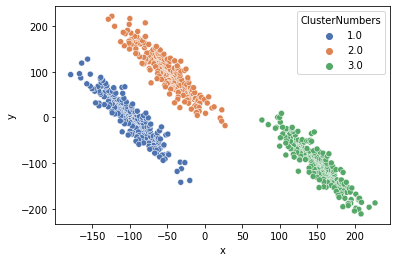

In [15]:
df_no_outliers = df_fast[df_fast['isOutlier']==0]
sn.scatterplot(df_no_outliers.x, df_no_outliers.y, df_no_outliers.ClusterNumbers, palette='deep')

/home/dhruv/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

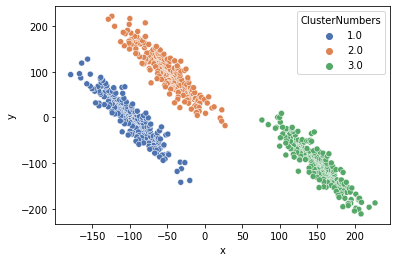

In [16]:
df_only_cluster = df_fast[df_fast['ClusterNumbers']!=0]
sn.scatterplot(df_only_cluster.x, df_only_cluster.y, df_only_cluster.ClusterNumbers, palette='deep')

In [17]:
sn.scatterplot(df.x, df.y, df.ClusterNumbers)

AttributeError: 'DataFrame' object has no attribute 'ClusterNumbers'

In [18]:
df_no_outliers = df[df['isOutlier']==0]

KeyError: 'isOutlier'

/home/dhruv/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

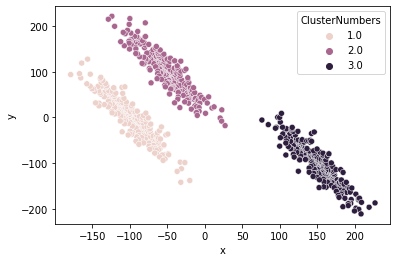

In [19]:
sn.scatterplot(df_no_outliers.x, df_no_outliers.y, df_no_outliers.ClusterNumbers)

In [20]:
df_outliers = df[df['ClusterNumbers']==0]

KeyError: 'ClusterNumbers'

In [21]:
sn.scatterplot(df_outliers.x, df_outliers.y, df_outliers.ClusterNumbers)

NameError: name 'df_outliers' is not defined

In [22]:
df_outliers = df[df['isOutlier']==1]
sn.scatterplot(df_outliers.x, df_outliers.y, df_outliers.ClusterNumbers)

KeyError: 'isOutlier'

In [23]:
df_clusters = df[df['ClusterNumbers']!=0]


KeyError: 'ClusterNumbers'

In [24]:
sn.scatterplot(df_clusters.x, df_clusters.y, df_clusters.ClusterNumbers)

NameError: name 'df_clusters' is not defined

In [25]:
df['ClusterNumbers'].value_counts()

KeyError: 'ClusterNumbers'

In [26]:
df['isOutlier'].value_counts()

KeyError: 'isOutlier'

In [27]:
df[df_true['isSeed']==1]

<ipython-input-27-ffdcdb31a8de>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df_true['isSeed']==1]


,Unnamed: 0,x,y,clusterId,weight,layer
315,15,-102.921789,191.038300,2.0,3.463342,0.0
517,217,-13.335949,54.456482,2.0,10.909704,0.0
617,17,165.943877,-134.626346,3.0,22.439471,0.0
619,19,166.835955,-138.674355,3.0,20.005323,0.0
644,44,163.508532,-141.843865,3.0,14.374254,0.0
875,275,181.293893,-137.069778,3.0,13.978274,0.0


In [28]:
sn.scatterplot(df[df['ClusterNumbers'].isin([10,6,1,8])].x, df[df['ClusterNumbers'].isin([10,6,1,8])].y, df[df['ClusterNumbers'].isin([10,6,1,8])].ClusterNumbers, palette='deep')

KeyError: 'ClusterNumbers'

In [29]:
df['ClusterNumbers'] == [4,8]

KeyError: 'ClusterNumbers'

In [30]:
df_true = pd.read_csv('datasets/toyDetector_5k_20_25_2.csv')
df_true = df_true[df_true.layer==0]
df_true

,index,x,y,layer,weight,rho,delta,nh,isSeed,clusterId
0,0,-125.62,-19.29,0,1,26.0,0.662118,3953,0,206
1,1,-125.55,-15.88,0,1,27.5,16.566900,3940,0,206
2,2,-124.31,-19.01,0,1,25.5,0.381187,3957,0,206
3,3,-129.71,-20.03,0,1,26.5,1.647790,5,0,206
4,4,-125.19,-17.73,0,1,26.5,1.231790,3958,0,206
...,...,...,...,...,...,...,...,...,...,...
4995,4995,219.80,-98.78,0,1,17.5,31.438100,2485,0,44
4996,4996,-91.30,-203.86,0,1,1.5,7.883360,4964,0,846
4997,4997,211.69,26.87,0,1,20.0,13.403800,4782,0,392
4998,4998,120.60,-175.63,0,1,9.0,12.042100,3233,0,361


/home/dhruv/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

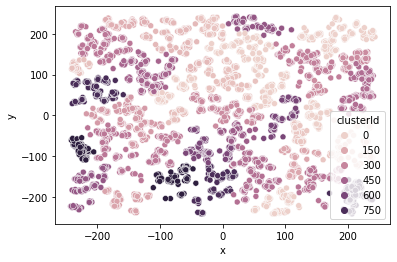

In [31]:
sn.scatterplot(df_true.x, df_true.y, df_true.clusterId)

In [32]:
df = pd.read_csv('datasets/dataset1.csv')
df.head()

,Unnamed: 0,x,y,layer,weight,rho,NH,ClusterNumbers,isOutlier,isSeed,delta
0,0,-51.86,-64.09,0.0,1.0,16.0,147.0,0.0,0.0,0.0,7.229115
1,1,98.02,-43.68,0.0,1.0,16.5,572.0,0.0,0.0,0.0,1.888280
2,2,-66.32,-35.50,0.0,1.0,27.5,205.0,0.0,0.0,0.0,3.497571
3,3,-52.16,-34.61,0.0,1.0,18.5,199.0,0.0,0.0,0.0,0.404969
4,4,-82.97,-17.03,0.0,1.0,25.5,541.0,0.0,0.0,0.0,2.760072


In [33]:
df[df['isSeed']==1]

,Unnamed: 0,x,y,layer,weight,rho,NH,ClusterNumbers,isOutlier,isSeed,delta
51,51,-84.64,113.85,0.0,1.0,32.5,inf,1.0,0.0,1.0,999.000000
168,168,-54.23,79.47,0.0,1.0,32.0,inf,2.0,0.0,1.0,999.000000
175,175,164.00,-135.47,0.0,1.0,28.0,778.0,3.0,0.0,1.0,35.449417
205,205,-69.63,-36.63,0.0,1.0,29.5,800.0,4.0,0.0,1.0,38.039891
212,212,-55.87,76.23,0.0,1.0,32.0,inf,5.0,0.0,1.0,999.000000
214,214,135.46,-95.24,0.0,1.0,32.5,inf,6.0,0.0,1.0,999.000000
375,375,-70.27,-28.62,0.0,1.0,29.5,800.0,7.0,0.0,1.0,32.008327
608,608,167.18,-144.11,0.0,1.0,28.0,inf,8.0,0.0,1.0,999.000000
694,694,169.16,-143.03,0.0,1.0,28.0,inf,9.0,0.0,1.0,999.000000
972,972,-102.79,4.48,0.0,1.0,32.0,inf,10.0,0.0,1.0,999.000000


In [34]:
df[df['NH']==101]

,Unnamed: 0,x,y,layer,weight,rho,NH,ClusterNumbers,isOutlier,isSeed,delta


In [35]:
chosen_layer = 0
sortpar = 'weight'
df = df[df['layer']==chosen_layer].sort_values(sortpar, ascending=False, ignore_index=True)

In [36]:
semiMajorAxis =50
phi = 2*np.pi/3
semiMinorAxis = 10
varX1 = semiMajorAxis**2 * np.cos(phi)**2 + semiMinorAxis**2 * np.sin(phi)**2
varX2 = semiMajorAxis** 2 * np.sin(phi)**2 + semiMinorAxis**2 * np.cos(phi)**2
# cov12 = (semiMajorAxis**2 - semiMinorAxis**2) * np.sin(phi) * np.cos(phi) 
cov12 = (2*np.random.random() -1)*np.sqrt(varX1*varX2)
cova = np.array([[varX1, cov12], [cov12, varX2]])
cova

array([[ 700.        ,  286.18559994],
       [ 286.18559994, 1900.        ]])

In [37]:
n_samples = [300]*2
n_noise = 5

means = [[-100,0],[100,0]]
covs = [800*np.eye(2)]*2
prefactor = [1e5]*3
n_clusters = len(means)
df = pd.DataFrame(columns=['x','y','clusterId'])
for i in range(n_clusters):
    a = np.random.multivariate_normal(mean=means[i], cov=covs[i], size=n_samples[i])
    df1 = pd.DataFrame(columns=['x','y','clusterId'], data=np.c_[a,(i+1)*np.ones((n_samples[i]))])
    df1['weight'] = prefactor[i]*multivariate_normal.pdf(df1[['x', 'y']].values, mean=means[i], cov=covs[i])
    df = pd.concat([df,df1])
noise = np.random.uniform(-250,250, (n_noise,2))
n = pd.DataFrame(columns=['x','y','clusterId', 'weight'], data=np.c_[noise,0*np.ones((n_noise)), 2*np.random.random(n_noise)])
df = pd.concat([df,n])
df['layer']=np.zeros(len(df))

<AxesSubplot:xlabel='x', ylabel='y'>

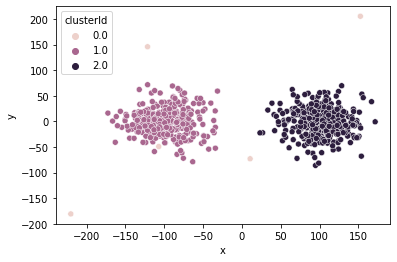

In [38]:
sn.scatterplot(data=df, x='x',y='y', hue='clusterId')

In [39]:
df['weight']

0     6.060326
1    10.191442
2     5.050830
3     8.350258
4     4.274819
       ...    
0     0.320891
1     0.014648
2     1.750030
3     1.060944
4     1.775200
Name: weight, Length: 605, dtype: float64

In [40]:
df.to_csv('datasets/gen_data.csv')

In [41]:

#     plt.savefig('homogeneities_varied_energy.png')

In [42]:

cova = np.array([[ 700.        ,  -96.88368962],
                [ -96.88368962, 1900.        ]])
np.linalg.eig(cova)

(array([ 692.22829178, 1907.77170822]),
 array([[-0.99679807,  0.07996004],
        [-0.07996004, -0.99679807]]))

In [85]:
sigmas = [1,10,100,1000,100000,10000]
n_noises = np.array([50,100,150,200,250,300])


In [86]:
mi = []
for sigma in sigmas:
    guess = np.pi*(sigma/(500**2))
    mi.append([(300/(n_noises[i]+300)) * log2((n_noises[i]+300)*300 / ((300+(guess)*n_noises[i])*300))
    +(((guess)*n_noises[i])/(n_noises[i]+300)) * log2((n_noises[i]+300)*((guess)*n_noises[i]) / ((300+(guess)*n_noises[i]) * n_noises[i]))
    +((1-(guess))*n_noises[i]/(n_noises[i]+300)) * log2((n_noises[i]+300)*(1-(guess))*n_noises[i] / (n_noises[i] * (1-(guess))*n_noises[i])) for i in range(len(n_noises))])


In [87]:
scores = np.array(mi)/np.array([-300/((n_noises[i]+300))*log2(300/((n_noises[i]+300))) - n_noises[i]/((n_noises[i]+300))*log2(n_noises[i]/((n_noises[i]+300))) for i in range(len(n_noises))])

In [88]:
scores

array([[ 0.99993838,  0.99992523,  0.9999146 ,  0.99990522,  0.99989665,
         0.99988864],
       [ 0.99948463,  0.99938096,  0.99929749,  0.99922419,  0.99915737,
         0.99909516],
       [ 0.99585419,  0.99509593,  0.99449002,  0.99396138,  0.99348215,
         0.99303835],
       [ 0.9686169 ,  0.96381257,  0.96003454,  0.95678309,  0.95387139,
         0.95120472],
       [-0.16497502, -0.14822507, -0.13730692, -0.12925166, -0.12292868,
        -0.11776904],
       [ 0.78655026,  0.76572682,  0.75005548,  0.73707233,  0.72583746,
         0.71586636]])

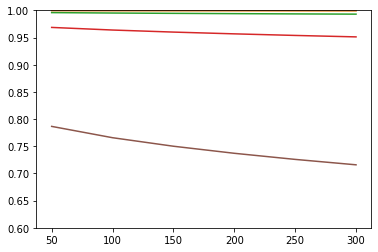

In [102]:

# plt.plot(noise_sizes, np.mean(h_scores, axis=1))
# plt.fill_between(noise_sizes, np.mean(h_scores, axis=1)-np.std(h_scores, axis=1), np.mean(h_scores, axis=1)+np.std(h_scores, axis=1), alpha=0.2)
output_dir = 'output/noise_sigma/'
h_scores = np.load(output_dir+'h_scores_noise_sigma_' + str(sigmas[-1]) + '.npy')  
h_scores.shape
for i in range(len(sigmas)):            
#     plt.plot(n_noises, np.mean(h_scores[1:,:,i], axis=1), label='homogeneity')
#     plt.fill_between(n_noises, np.mean(h_scores[1:,:,i], axis=1)-np.std(h_scores[1:,:,i], axis=1), np.mean(h_scores[1:,:,i], axis=1)+np.std(h_scores[1:,:,i], axis=1), alpha=0.2)
    plt.plot(n_noises, scores[i,:])
    plt.ylim(0.6,1)

# scores_loaded.shape

#ADD dc to radius, check other probability thresholds

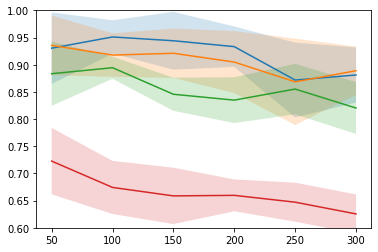

In [103]:
output_dir = 'output/noise_sigma/'
h_scores = np.load(output_dir+'h_scores_noise_sigma_' + str(sigmas[-1]) + '.npy')  
h_scores.shape
for i in range(len(sigmas)):            
    plt.plot(n_noises, np.mean(h_scores[1:,:,i], axis=1), label='homogeneity')
    plt.fill_between(n_noises, np.mean(h_scores[1:,:,i], axis=1)-np.std(h_scores[1:,:,i], axis=1), np.mean(h_scores[1:,:,i], axis=1)+np.std(h_scores[1:,:,i], axis=1), alpha=0.2)
#     plt.plot(n_noises, scores[i,:])
    plt.ylim(0.6,1)

In [49]:
scores = np.array(mi)/np.array([-300/((n_noises[i]+300))*log2(300/((n_noises[i]+300))) - n_noises[i]/((n_noises[i]+300))*log2(n_noises[i]/((n_noises[i]+300))) for i in range(len(n_noises))])

NameError: name 'mi' is not defined

In [50]:
chi2.ppf(0.99,df=2)

9.21034037197618

(6, 2, 14)


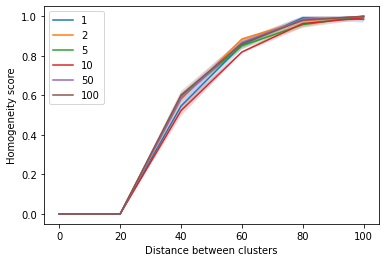

In [51]:
a = np.load('output_circles/homogeneities_varied_energy.npy')
a.shape
n=6
noise_sizes = list(range(n))
dists = [0,20,40,60,80,100, 120, 140]

prefactors = [1, 2,5,10,50, 100]
a = a[:n,:,:]
print(a.shape)
for i in range(n):
    c_scores = a[:,:,i]
    plt.plot(dists[:n], np.mean(c_scores, axis=1), label=str(prefactors[i]))
    plt.fill_between(dists[:n], np.mean(c_scores,axis=1)-np.std(c_scores, axis=1), np.mean(c_scores, axis=1)+np.std(c_scores, axis=1), alpha=0.2)
# 
plt.xlabel('Distance between clusters')
plt.ylabel('Homogeneity score')
plt.legend()
#TODO: factors: 

In [52]:
chi2.ppf(.999999,2)

27.631021115871036

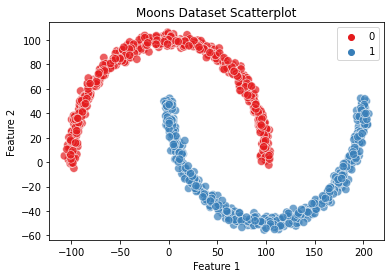

In [53]:
# Generate the moons dataset
def assign_layer(row):
    if row['clusterId'] == 0:
        return row['y']
    elif row['clusterId'] == 1:
        return 60 - row['y']
    
X, y = make_moons(n_samples=1000, noise = 0.03)
X = 100*X

# Create a scatterplot using seaborn
# plt.figure(figsize=(8, 6))
sn.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="Set1", s=70, alpha=0.7)
plt.title("Moons Dataset Scatterplot")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
# plt.grid(True)
plt.show()
data = pd.DataFrame({'x': X[:, 0], 'y': X[:, 1], 'clusterId': y, 'layer': np.zeros(len(X))})
data['weight'] = data.apply(assign_layer, axis=1)
data.to_csv('datasets/moons_varied.csv')

In [54]:
data

,x,y,clusterId,layer,weight
0,64.480055,-42.183250,1,0.0,102.183250
1,138.333190,-39.036429,1,0.0,99.036429
2,-17.893623,98.645147,0,0.0,98.645147
3,15.966555,94.760696,0,0.0,94.760696
4,-32.119897,97.262517,0,0.0,97.262517
...,...,...,...,...,...
995,89.554515,47.440553,0,0.0,47.440553
996,99.871179,-54.123899,1,0.0,114.123899
997,-40.064616,87.452797,0,0.0,87.452797
998,42.897908,-31.807022,1,0.0,91.807022


In [55]:
np.where(df['clusterId'] == 1, df['y'], 60-df['y']).shape

(605,)

In [56]:
data.head()

,x,y,clusterId,layer,weight
0,64.480055,-42.183250,1,0.0,102.183250
1,138.333190,-39.036429,1,0.0,99.036429
2,-17.893623,98.645147,0,0.0,98.645147
3,15.966555,94.760696,0,0.0,94.760696
4,-32.119897,97.262517,0,0.0,97.262517


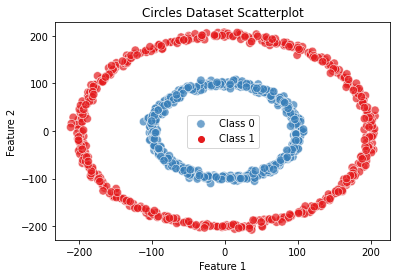

In [58]:
def assign_layer(row):
    if row['clusterId'] == 0:
        return -(row['y']-200)/10
    elif row['clusterId'] == 1:
        return (row['y']+100)/5
X, y = make_circles(n_samples=1000, noise=0.02, factor =0.5)
X = 200*X
# Create a scatterplot using seaborn
# plt.figure(figsize=(8, 6))
sn.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="Set1", s=70, alpha=0.7)
plt.title("Circles Dataset Scatterplot")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(["Class 0", "Class 1"])
data = pd.DataFrame({'x': X[:, 0], 'y': X[:, 1], 'clusterId': y, 'layer': np.zeros(len(X))})
data['weight'] = data.apply(assign_layer, axis=1)
data.to_csv('datasets/circles_varied.csv')

In [68]:
data[np.isclose(data['y'],-206, atol=1)]

,x,y,clusterId,layer,weight
286,13.486199,-206.110219,0,0.0,40.611022
